In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image


def generate_noise_patch(image, normalize = True,
                         global_size = 64, global_stride=32,
                         local_size=16, local_stride=16,
                         mu=0.1, gamma=0.25):
    
    row, col, ch = image.shape
    
    noise_patch = np.empty((1, global_size, global_size, ch), image.dtype)
    image_patch = np.empty((1, global_size, global_size, ch), image.dtype)
    
    global_start_row = np.arange(0, row - global_size, global_stride)
    global_start_col = np.arange(0, col - global_size, global_stride)
    
    for global_row in global_start_row:
        for global_col in global_start_col:
            global_image = image[global_row:global_row+global_size, global_col:global_col+global_size, :]
            
            noise = True
            
            local_start_row = np.arange(0, global_size - local_size, local_stride)
            local_start_col = np.arange(0, global_size - local_size, local_stride)
            
            for local_row in local_start_row:
                for local_col in local_start_col:
                    local_image = global_image[local_row:local_row+local_size, local_col:local_col+local_size, :]
                    
                    if abs(global_image.mean() - local_image.mean()) >= (mu * local_image.mean()):
                        noise = False

                    if abs(global_image.var() - local_image.var()) >= (gamma * local_image.var()):
                        noise = False
                    
                    if not noise:
                        break
                
                if not noise:
                    break
            
            if not noise:                
                image_patch = np.concatenate((image_patch, np.expand_dims(global_image, axis=0)), axis=0)
            else:
                noise_patch = np.concatenate((noise_patch, np.expand_dims(global_image, axis=0)), axis=0)
    
    if normalize:
        image_patch -= image_patch.mean()
        noise_patch -= noise_patch.mean()
    
    return image_patch[1:,], noise_patch[1:,]

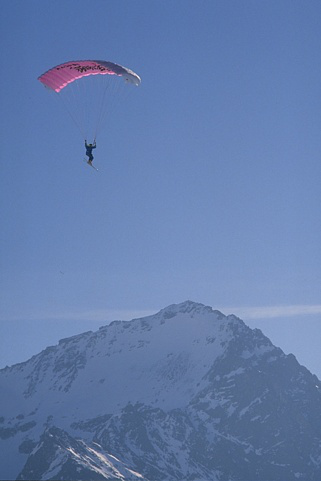

In [2]:
original = Image.open("/home/col/Desktop/BME 590/HW3/gcbd/60079.jpg")
display(original)

In [3]:
original = np.array(original)
image, noise = generate_noise_patch(original, normalize = False)

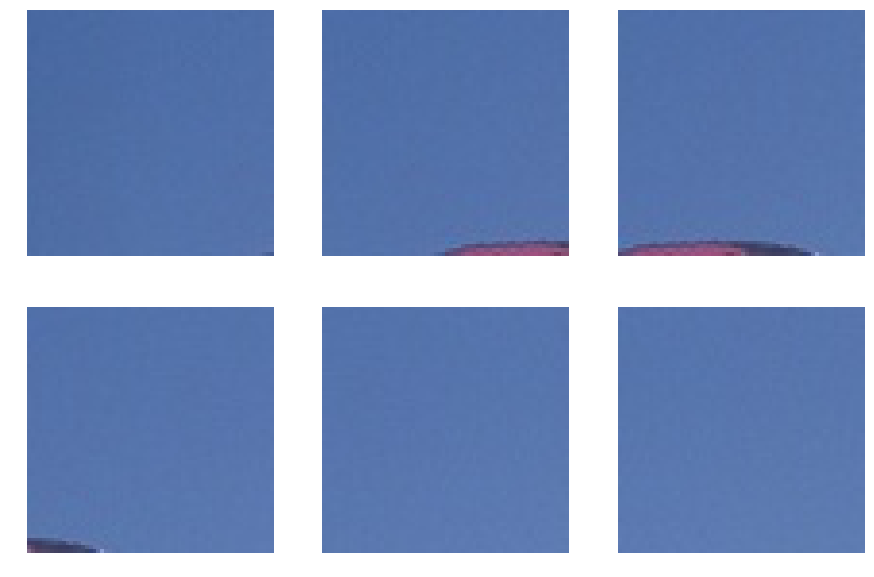

In [4]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15., 10.)

for i in range(2):
    for j in range(3):
        axs[i,j].imshow(noise[i*3+j,])
        axs[i,j].axis('off')

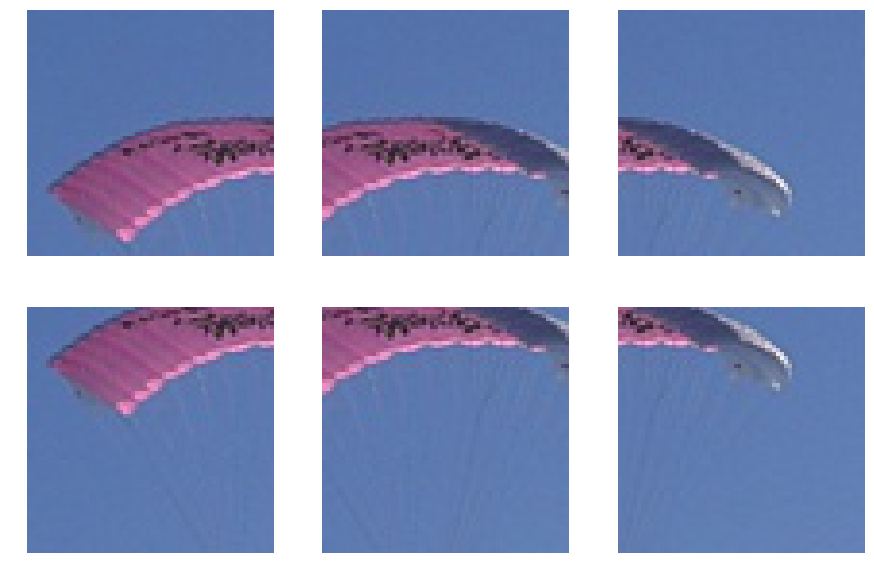

In [5]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15., 10.)

for i in range(2):
    for j in range(3):
        axs[i,j].imshow(image[i*3+j,])
        axs[i,j].axis('off')

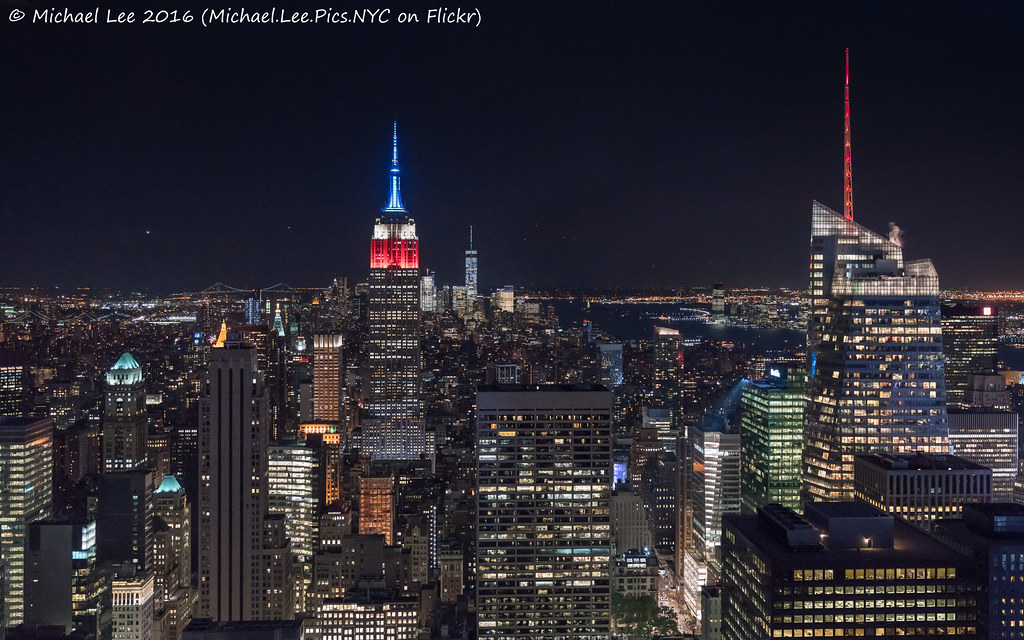

In [34]:
original = Image.open("/home/col/Desktop/BME 590/HW3/gcbd/night.jpg")
display(original)

In [7]:
original = np.array(original)
image, noise = generate_noise_patch(original, normalize = False)

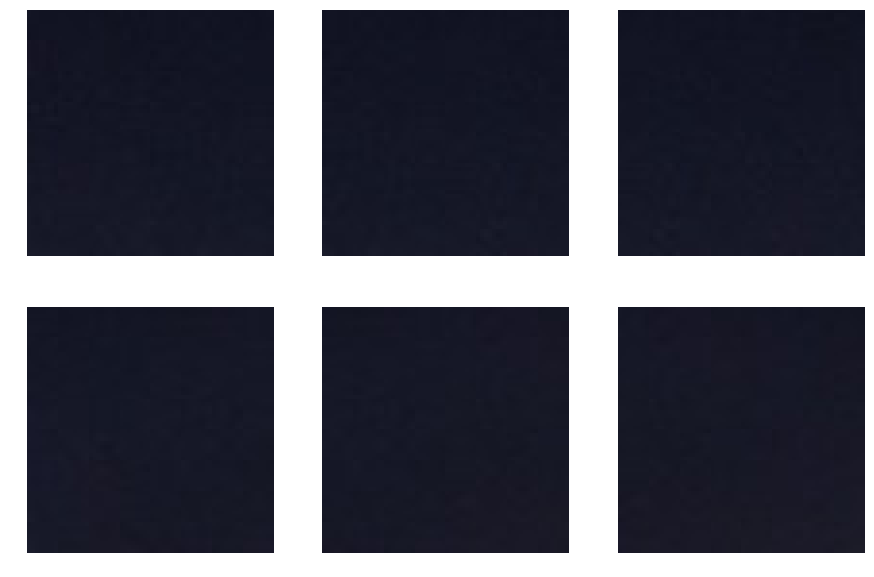

In [29]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15., 10.)

for i in range(2):
    for j in range(3):
        axs[i,j].imshow(noise[i*3+j+60,])
        axs[i,j].axis('off')

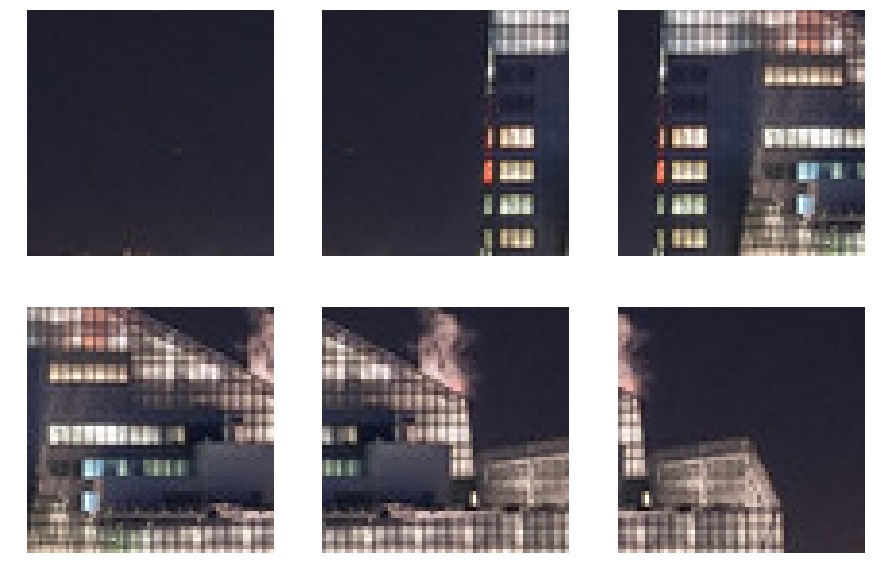

In [32]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15., 10.)

for i in range(2):
    for j in range(3):
        axs[i,j].imshow(image[i*3+j+155,])
        axs[i,j].axis('off')